### Import necessary Libraries

In [1]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_1         3.1 MB  conda-forge
    certifi-2018.10.15         |        py36_1000         138 KB  conda-forge
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge
    conda-4.5.11               |        py36_1000         651 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0            conda-forge
    geopy:           

### Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'RZXKHNEEKFCYNPTWZEHPDEBXJ4RZEBA2YTLR2JHWFP1SNBRL' # your Foursquare ID
CLIENT_SECRET = '1DNZN4OTYYXURRRKKWG1LWQMAC4DQ3OP0WTBR0VCQOPBN3DP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RZXKHNEEKFCYNPTWZEHPDEBXJ4RZEBA2YTLR2JHWFP1SNBRL
CLIENT_SECRET:1DNZN4OTYYXURRRKKWG1LWQMAC4DQ3OP0WTBR0VCQOPBN3DP


#### Get the latitude and longitude of Manhattan

In [30]:
address = 'Manhattan, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


40.7900869 -73.9598295


#### Search 10 highly rated restaurants in Manhattan

In [105]:
search_query = 'Restaurant'
limit = 10
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.\
format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query,limit)
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.shape

(10, 25)

#### Filter the name, category, and anything associated with location

In [66]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Gabriela's Restaurant & Tequila Bar,Mexican Restaurant,688 Columbus Ave,US,New York,United States,at 93rd St.,761,"[688 Columbus Ave (at 93rd St.), New York, NY 10025, United States]","[{'label': 'display', 'lat': 40.79123991711048, 'lng': -73.96873529559616}]",40.791240,-73.968735,NaN,10025,NY,49f3ab02f964a520d16a1fe3
1,Fred's Restaurant,American Restaurant,476 Amsterdam Ave,US,New York,United States,at W 83rd St,1494,"[476 Amsterdam Ave (at W 83rd St), New York, NY 10024, United States]","[{'label': 'display', 'lat': 40.7855722, 'lng': -73.976527}]",40.785572,-73.976527,NaN,10024,NY,44281118f964a520ba311fe3
2,3 Guys Restaurant,Diner,49 E 96th St,US,New York,United States,Madison Ave,570,"[49 E 96th St (Madison Ave), New York, NY 10128, United States]","[{'label': 'display', 'lat': 40.787442622504265, 'lng': -73.95403610873488}]",40.787443,-73.954036,NaN,10128,NY,4a897cb1f964a5201f0820e3
3,Junior's Restaurant & Bakery,American Restaurant,1515 Broadway,US,New York,United States,at W 45th St,4168,"[1515 Broadway (at W 45th St), New York, NY 10036, United States]","[{'label': 'display', 'lat': 40.758539, 'lng': -73.986477}]",40.758539,-73.986477,Theater District,10036,NY,462a6065f964a520d9451fe3
4,Carmine's Italian Restaurant,Italian Restaurant,2450 Broadway,US,New York,United States,btwn W 90th & W 91st,1198,"[2450 Broadway (btwn W 90th & W 91st), New York, NY 10024, United States]","[{'label': 'display', 'lat': 40.7910963, 'lng': -73.9739914}]",40.791096,-73.973991,NaN,10024,NY,4a7778a1f964a5209be41fe3
5,Demarchelier Restaurant,Bistro,50 E 86th St,US,New York,United States,at Madison Ave,1042,"[50 E 86th St (at Madison Ave), New York, NY 10028, United States]","[{'label': 'display', 'lat': 40.780769874738176, 'lng': -73.95861316760823}]",40.780770,-73.958613,NaN,10028,NY,4a9037cef964a5209a1620e3
6,Tom's Restaurant,Diner,2880 Broadway,US,New York,United States,at W 112th St,1785,"[2880 Broadway (at W 112th St), New York, NY 10025, United States]","[{'label': 'display', 'lat': 40.80549395837133, 'lng': -73.96571226552344}]",40.805494,-73.965712,NaN,10025,NY,415c9e00f964a520501d1fe3
7,Malecon Restaurant II,Latin American Restaurant,764 Amsterdam Ave,US,New York,United States,btw 97th St & 98th St,987,"[764 Amsterdam Ave (btw 97th St & 98th St), New York, NY 10025, United States]","[{'label': 'display', 'lat': 40.79493159833159, 'lng': -73.96964755745924}]",40.794932,-73.969648,NaN,10025,NY,4a2eb2b0f964a52036981fe3
8,Carmine’s Italian Restaurant,Italian Restaurant,200 W 44th St,US,New York,United States,btwn Broadway & 8th Ave,4280,"[200 W 44th St (btwn Broadway & 8th Ave), New York, NY 10036, United States]","[{'label': 'display', 'lat': 40.7574973, 'lng': -73.9867788}]",40.757497,-73.986779,NaN,10036,NY,3fd66200f964a5209ee81ee3
9,The New Amity Restaurant,Diner,1134 Madison Ave,US,New York,United States,84th St.,1144,"[1134 Madison Ave (84th St.), New York, NY 10028, United States]","[{'label': 'display', 'lat': 40.77980470462351, 'lng': -73.95966389381256}]",40.779805,-73.959664,NaN,10028,NY,4b282b9af964a520309024e3


#### Generate map of Manhattan with markers of the 10 restaurants.

In [68]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) 

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

#### Install Word Cloud 

In [72]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0 conda-forge


wordcloud-1.4.1      | 324 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Wordcloud is installed and imported!


In [106]:
get_tip_text('4a897cb1f964a5201f0820e3')

" i've been here literally 100 times. it took 100 tries but i finally found something i like, something that's a bit better than mediocre, which most of their food is. the pasta primavera! yumalways busy here, bc they're next to a hospital duh. overall, salads and stuffed flat breads are really good. a bit pricey and if really busy go somewhere else or experience rushed everything :/ "

#### Build a function to extract the tip text

In [97]:
# function that extracts the tip text
def get_tip_text(venue_id):
    limit = 15 # set limit to be greater than or equal to the total number of tips
    url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'\
    .format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)
    results = requests.get(url).json()
    try:
        tips = results['response']['tips']['items']
        tips_df = json_normalize(tips) # json normalize tips
        # columns to keep
        filtered_columns = ['text']
        tips_filtered = tips_df.loc[:, filtered_columns]
        val_tot = ' '
        for val in tips_filtered['text']:
            val_tot = val_tot + str(val)
        tokens = val_tot.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        comment_words = ' '         
        for words in tokens: 
            comment_words = comment_words + words + ' '
    except:
        comment_words = ' '
        
    if len(comment_words) == 0:
        return None
    else:
        return comment_words

#### Plot the word cloud for each restaurant.

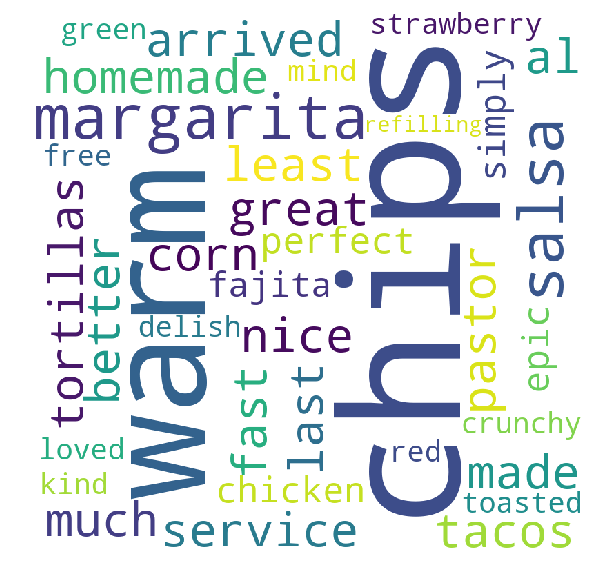

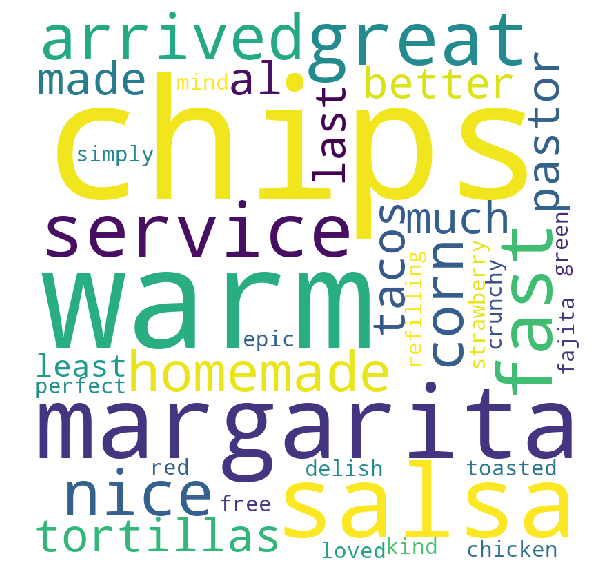

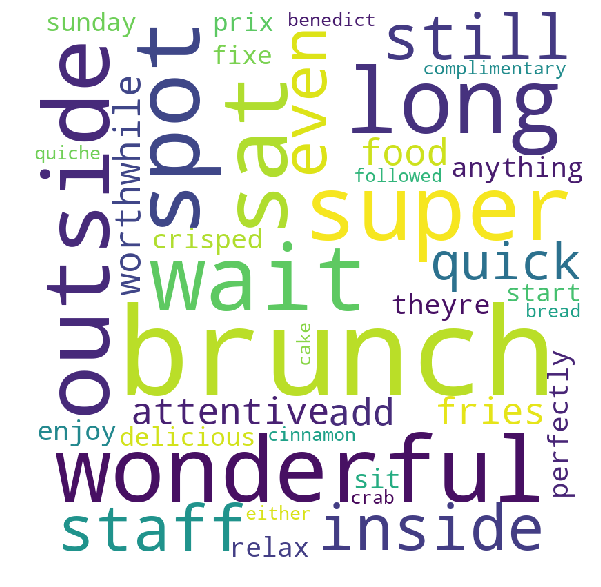

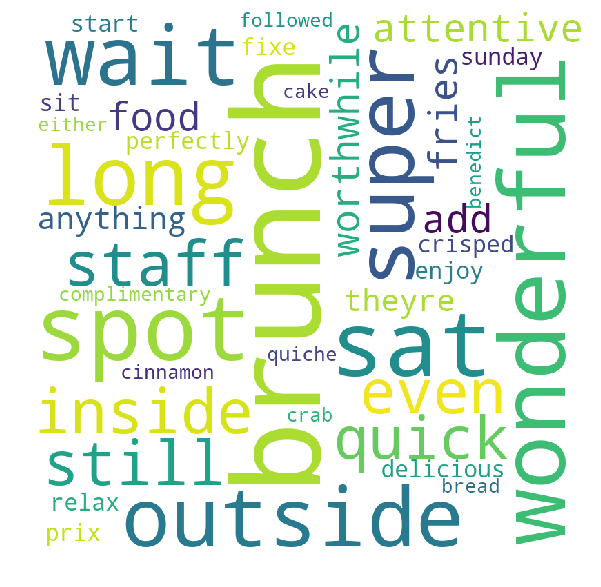

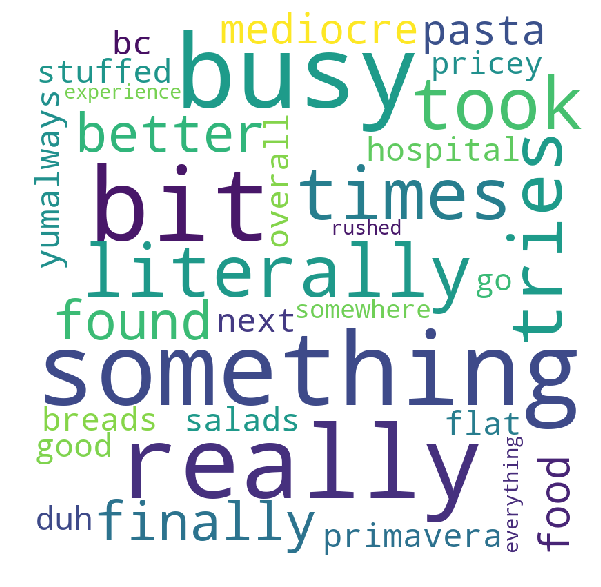

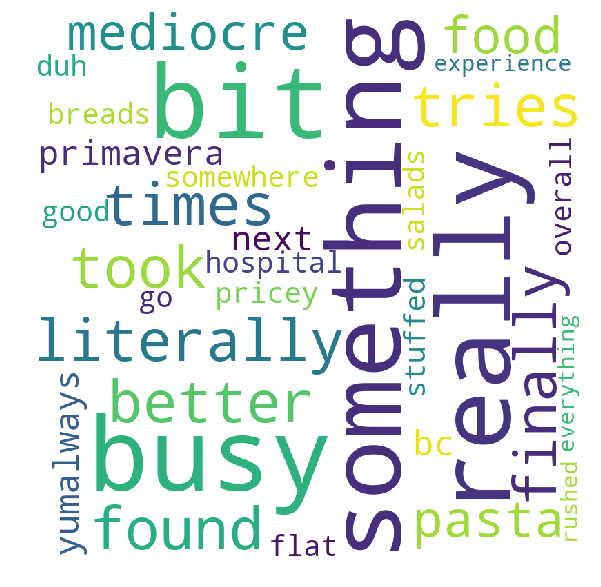

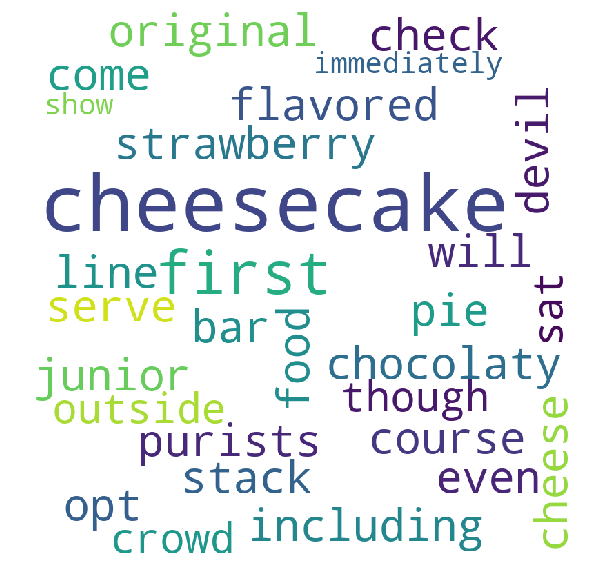

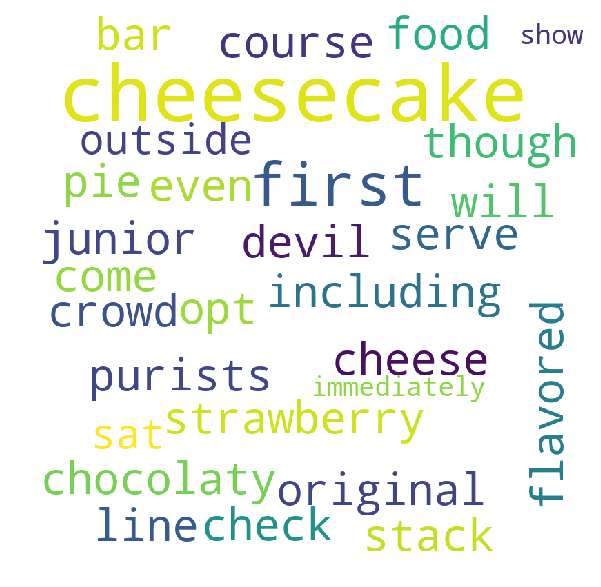

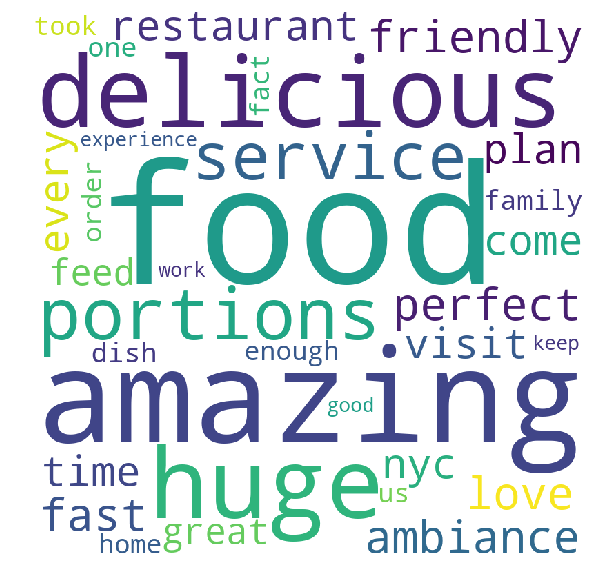

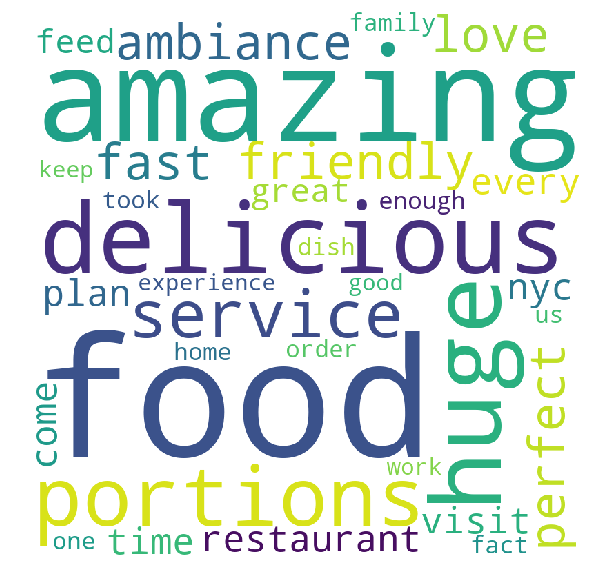

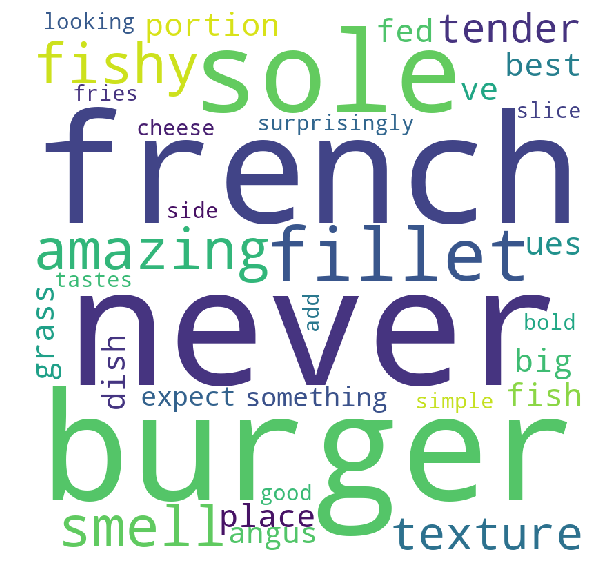

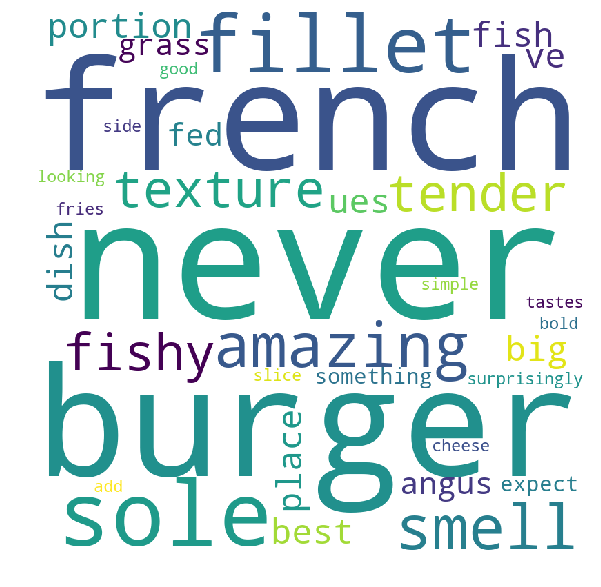

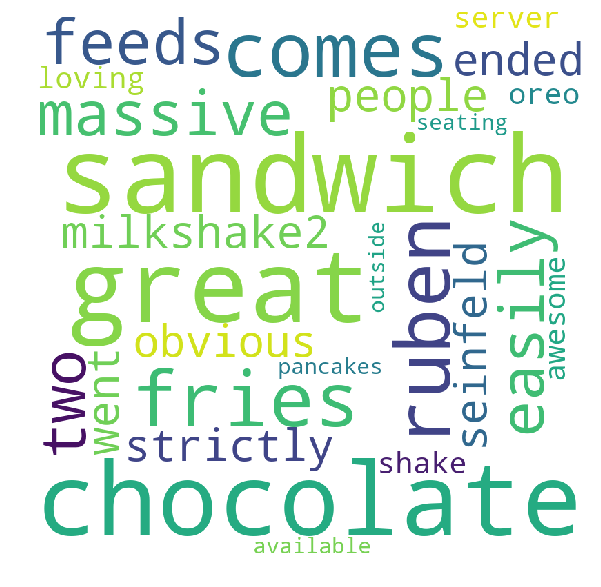

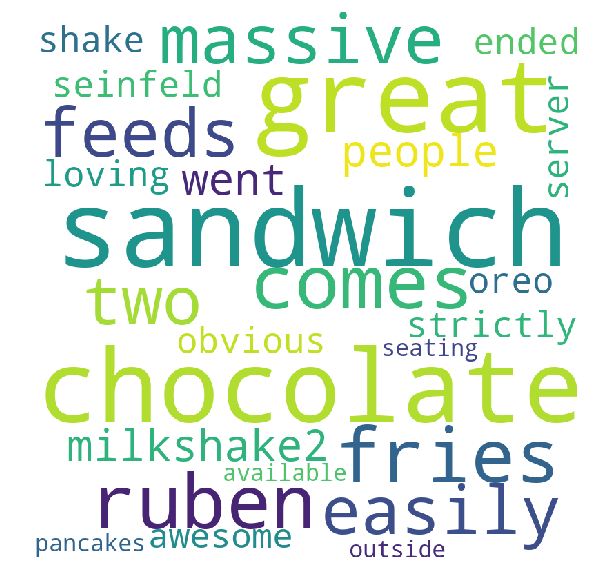

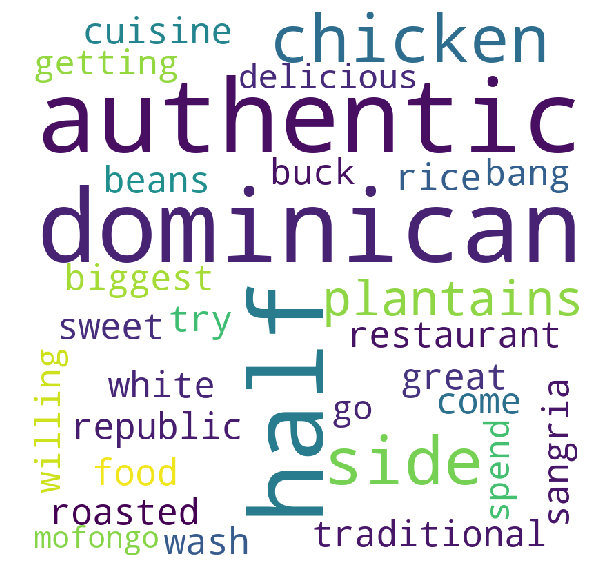

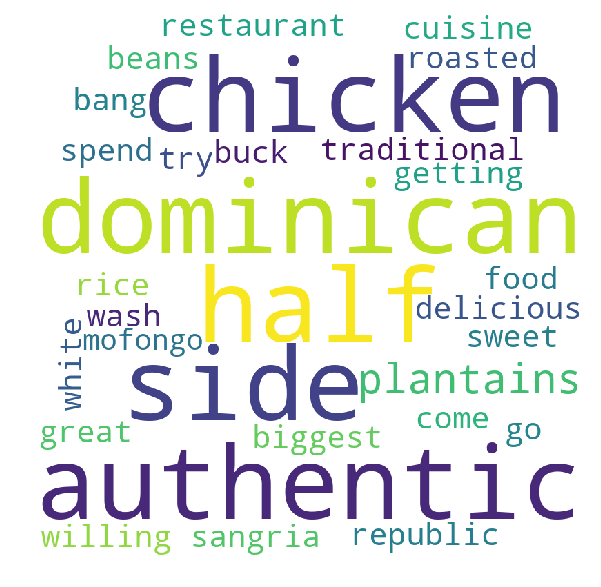

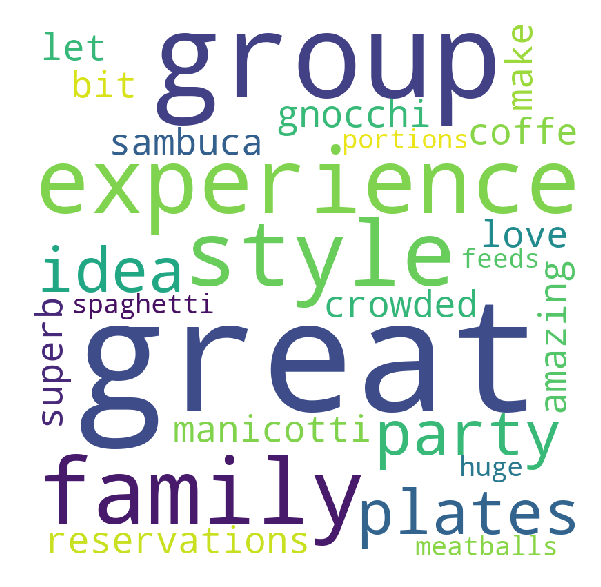

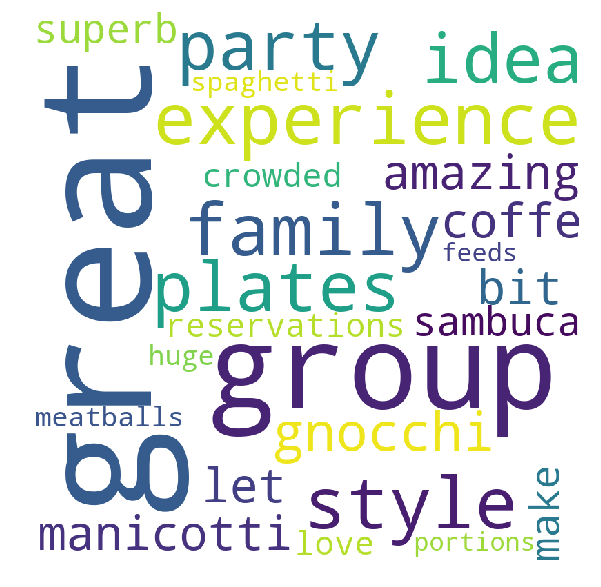

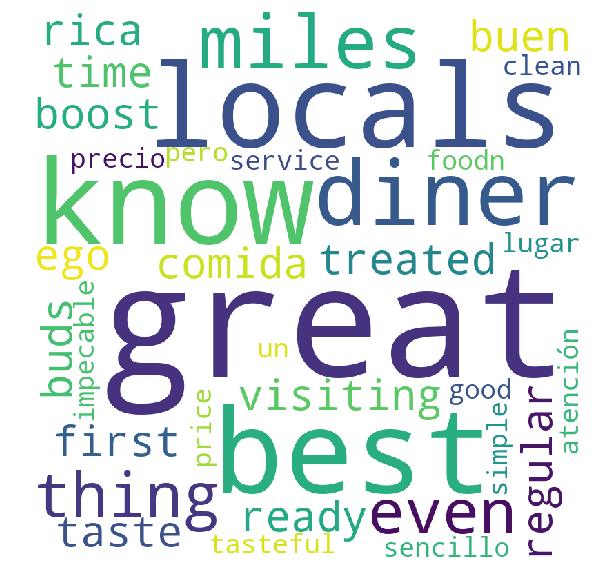

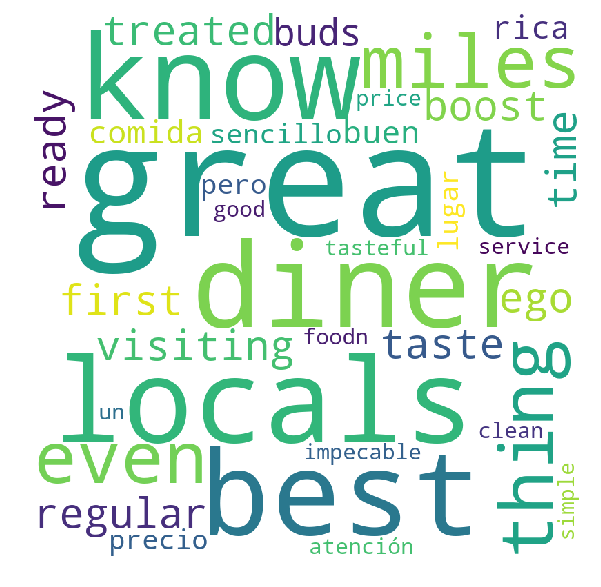

In [101]:
stopwords = set(STOPWORDS) 
for name, venue_id in zip(dataframe_filtered['name'], dataframe_filtered['id']):
    comment_words = get_tip_text(venue_id)
    generate_word(comment_words)    
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    plt.savefig('name_tip_WordCloud'+name+'.png')
    plt.show() 
    